**Day - 1**

In [ ]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [ ]:
!nvidia-smi

Sun Aug 27 17:50:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tensor1 = torch.tensor(7)
tensor2 = torch.tensor([1,2])
tensor3 = torch.tensor([[1,2]])
tensor4 = torch.tensor([[4,5],[6,7]])
tensor5 = torch.tensor([[[1,2],[3,4]]])

print(tensor1.ndim,tensor2.ndim,tensor3.ndim,tensor4.ndim,tensor5.ndim)
print(tensor1.shape,tensor2.shape,tensor3.shape,tensor4.shape,tensor5.shape)

0 1 2 2 3
torch.Size([]) torch.Size([2]) torch.Size([1, 2]) torch.Size([2, 2]) torch.Size([1, 2, 2])


In [ ]:
random_tensor = torch.rand((1,3,3))
print(random_tensor.ndim, random_tensor.shape)
print(random_tensor)

3 torch.Size([1, 3, 3])
tensor([[[0.6487, 0.9613, 0.7772],
         [0.9857, 0.9756, 0.8242],
         [0.6960, 0.5135, 0.3615]]])


In [ ]:
zeros = torch.zeros(3,3)
print(zeros.ndim, zeros.shape, zeros.dtype, zeros.device)
print(zeros)

ones = torch.ones(3,3)
print(ones.ndim, ones.shape, ones.dtype, ones.device, ones.requires_grad)
print(ones)

2 torch.Size([3, 3]) torch.float32 cpu
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
2 torch.Size([3, 3]) torch.float32 cpu False
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
tensor_range = torch.range(1,5,0.1)
tensor_arange = torch.arange(2,6,0.5)
print(tensor_range.ndim, tensor_range.shape)
print(tensor_range,"\n")
print(tensor_arange.ndim, tensor_arange.shape)
print(tensor_arange)

1 torch.Size([41])
tensor([1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000,
        2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000, 3.6000,
        3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000, 4.5000,
        4.6000, 4.7000, 4.8000, 4.9000, 5.0000]) 

1 torch.Size([8])
tensor([2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000, 5.5000])


<ipython-input-6-5d044ec82c3b>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  tensor_range = torch.range(1,5,0.1)


In [ ]:
tens_wo_shape = torch.zeros_like(tensor_range)
tens_wo_shape_arange = torch.ones_like(tensor_arange)
print(tensor_range.shape, tens_wo_shape.shape,"\n")
print(tensor_arange.shape, tens_wo_shape_arange.shape)

torch.Size([41]) torch.Size([41]) 

torch.Size([8]) torch.Size([8])


In [ ]:
print(f"Tensor 1 datatype is: {tensor1.dtype}")
tensor1 = tensor1.type(torch.int8)
print(f"Dtype after change is: {tensor1.dtype}")

Tensor 1 datatype is: torch.int64
Dtype after change is: torch.int8


In [ ]:
print(torch.max(tensor1))
print(torch.min(tensor1))
print(torch.mean(tensor_range))
print(torch.sum(tensor1))

tensor(7, dtype=torch.int8)
tensor(7, dtype=torch.int8)
tensor(3.)
tensor(7)


In [ ]:
print(f"Tensor range is on device: {tensor_range.device}\nAnd the type is: {type(tensor_range)}")
print(f"Now the device is: {tensor_range.to('cuda').device}")
print(f"Putting it back on cpu: {tensor_range.cpu().device}")
print(f"Converting to a numpy ndarray: {type(tensor_range.numpy())}")

Tensor range is on device: cpu
And the type is: <class 'torch.Tensor'>
Now the device is: cuda:0
Putting it back on cpu: cpu
Converting to a numpy ndarray: <class 'numpy.ndarray'>


**Day-2**

In [ ]:
import torch
import numpy as np
import pandas as pd
matmul1 = torch.ones((3,2))
matmul2 = torch.rand((3,2))

In [ ]:
print(f"When we try to multiply incompatible shapes: {matmul1 @ matmul2}")

RuntimeError: ignored

In [ ]:
print(f"When we multiply compatible shapes: {matmul1 @ matmul2.T}")

When we multiply compatible shapes: tensor([[0.5818, 0.8149, 1.1182],
        [0.5818, 0.8149, 1.1182],
        [0.5818, 0.8149, 1.1182]])


In [ ]:
random1 = torch.arange(0,100,10).type(torch.float32)
random2 = torch.arange(1,100,11).type(torch.float32)

print("For the first tensor:\n",random1.shape,random1.dtype,random1.device,random1.requires_grad)
print(f"Max: {torch.max(random1)}\nMin: {torch.min(random1)}\nMean: {torch.mean(random1)}\nSum: {torch.sum(random1)}")

print("Properties of second tensor:\n",random2.shape,random2.dtype,random2.device,random2.requires_grad)
print(f"Max: {torch.max(random2)}\nMin: {torch.min(random2)}\nMean: {torch.mean(random2)}\nSum: {torch.sum(random2)}")

For the first tensor:
 torch.Size([10]) torch.float32 cpu False
Max: 90.0
Min: 0.0
Mean: 45.0
Sum: 450.0
Properties of second tensor:
 torch.Size([9]) torch.float32 cpu False
Max: 89.0
Min: 1.0
Mean: 45.0
Sum: 405.0


In [ ]:
print(f"First tensor argmax: {torch.argmax(random1)}\nFirst tensor argmin {torch.argmin(random1)}")
print(f"Second tensor argmax: {torch.argmax(random2)}\nSecond tensor argmin: {torch.argmin(random2)}")

First tensor argmax: 9
First tensor argmin 0
Second tensor argmax: 8
Second tensor argmin: 0


In [ ]:
random3 = torch.rand(3,4).type(torch.float32)
print(random3.shape,random3.ndim)
random3_changed = random3.resize(2,6)
print(random3_changed.shape, random3.ndim)

torch.Size([3, 4]) 2
torch.Size([2, 6]) 2


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [ ]:
print(f"Using view: {random3_changed.view(3,4)}")

Using view: tensor([[0.8487, 0.5354, 0.9941, 0.3809],
        [0.9362, 0.4601, 0.9022, 0.8033],
        [0.6131, 0.8383, 0.6299, 0.0833]])


In [ ]:
random4 = torch.rand((1,4))
stacked_vert = torch.stack([random4,random4],dim=1)
print(f"Stacked vertically: {stacked_vert}\ndim: {stacked_vert.ndim}\nshape: {stacked_vert.shape}")

stacked_hori = torch.stack([random4,random4],dim=0)
print(f"Stacked vertically: {stacked_hori}\ndim: {stacked_hori.ndim}\nshape: {stacked_hori.shape}")

Stacked vertically: tensor([[[0.4505, 0.2481, 0.4784, 0.2379],
         [0.4505, 0.2481, 0.4784, 0.2379]]])
dim: 3
shape: torch.Size([1, 2, 4])
Stacked vertically: tensor([[[0.4505, 0.2481, 0.4784, 0.2379]],

        [[0.4505, 0.2481, 0.4784, 0.2379]]])
dim: 3
shape: torch.Size([2, 1, 4])


In [ ]:
print(f"Squeezing stacked verticaly: {stacked_vert.squeeze().shape}")
print(f"Unsqueezing stacked horizontally: {stacked_hori.unsqueeze(dim=1).shape}")

Squeezing stacked verticaly: torch.Size([2, 4])
Unsqueezing stacked horizontally: torch.Size([2, 1, 1, 4])


In [ ]:
print(f"Original: {stacked_hori.shape}\nTensor: {stacked_hori}")
permuted = stacked_hori.permute(0,2,1)
print(f"Permuted: {permuted.shape}\nPermuted tensor: {permuted}")
print(f"Original: {stacked_hori}")

Original: torch.Size([2, 1, 4])
Tensor: tensor([[[0.4505, 0.2481, 0.4784, 0.2379]],

        [[0.4505, 0.2481, 0.4784, 0.2379]]])
Permuted: torch.Size([2, 4, 1])
Permuted tensor: tensor([[[0.4505],
         [0.2481],
         [0.4784],
         [0.2379]],

        [[0.4505],
         [0.2481],
         [0.4784],
         [0.2379]]])
Original: tensor([[[0.4505, 0.2481, 0.4784, 0.2379]],

        [[0.4505, 0.2481, 0.4784, 0.2379]]])


In [ ]:
np_array = np.arange(1,100,1)
print(type(np_array))
tens = torch.from_numpy(np_array).type(torch.float32)
print(type(tens))
print(tens.device)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(tens.to(device).device)
print(f"Dtype of tensor: {tens.dtype}")

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
cpu
cuda:0
Dtype of tensor: torch.float32


In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(42)
weights = 0.7
bias = 0.3
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weights*X+bias
print(X.shape, X.dtype, X.device)
print(X)

torch.Size([50, 1]) torch.float32 cpu
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])


In [ ]:
train_x = X[:int(0.8*len(X)),0]
train_y = y[:int(0.8*len(X)),0]

val_x = X[int(0.8*len(X)):50,0]
val_y = y[int(0.8*len(X)):50,0]
print(train_x, '\n', val_x)
print(len(train_x),len(train_y), '\n', len(val_x),len(val_y))

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800]) 
 tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800])
40 40 
 10 10


In [ ]:
class model(nn.Module):
  def __init__(self):
    super(model,self).__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    # self.linear1 = nn.Linear(inp, hidden1)

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    z = self.weights*x+self.bias
    return z

In [ ]:
linear_regressor = model()

**Day-3**

In [ ]:
layers = list(linear_regressor.children())
print(layers)

[]


In [ ]:
from tqdm.auto import tqdm
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import pandas as pd
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

def train_loop(model,train_x,train_y,n_epochs, opt,criteria):
  loss_train=[]
  loss_val=[]
  for epoch in tqdm(range(n_epochs)):
    model.train()
    opt.zero_grad()
    yhat = model(train_x)
    l = criteria(yhat,train_y)
    l.backward()
    opt.step()
    loss_train.append(l.detach().numpy().item())

    model.eval()
    with torch.inference_mode():
      y_pred = model(val_x)
      l_val = criteria(y_pred,val_y)
      loss_val.append(l_val.detach().numpy().item())
      # acc_sample = (y_pred==y).sum().item()/len(val_x)
      # acc.append(acc_sample)
  return {'training loss':loss_train, 'validation loss':loss_val}

In [ ]:
opt = torch.optim.SGD(linear_regressor.parameters(), lr=0.001)
criteria = nn.L1Loss()
train_loop(linear_regressor, train_x, train_y, 1000, opt, criteria)

  0%|          | 0/1000 [00:00<?, ?it/s]

{'training loss': [0.009368782863020897,
  0.00933497678488493,
  0.009300263598561287,
  0.009266075678169727,
  0.00923173688352108,
  0.009197162464261055,
  0.009163210168480873,
  0.009128306061029434,
  0.009094642475247383,
  0.009059777483344078,
  0.009025735780596733,
  0.008991257287561893,
  0.008956830017268658,
  0.00892273336648941,
  0.00888793170452118,
  0.008854206651449203,
  0.008819302543997765,
  0.008785403333604336,
  0.008750781416893005,
  0.008716483600437641,
  0.008682256564497948,
  0.008647588081657887,
  0.008613725192844868,
  0.008578828535974026,
  0.00854505691677332,
  0.008510304614901543,
  0.008476154878735542,
  0.008441777899861336,
  0.008407248184084892,
  0.008373253978788853,
  0.00833834894001484,
  0.008304724469780922,
  0.00826982595026493,
  0.008235814049839973,
  0.008201301097869873,
  0.008166909217834473,
  0.008132776245474815,
  0.008098003454506397,
  0.008064254187047482,
  0.00802934356033802,
  0.007995473220944405,
  0.007

In [ ]:
print(f"original weight and bias are: {weights},{bias}\nAfter training model parameters are: {linear_regressor.state_dict()}")

original weight and bias are: 0.7,0.3
After training model parameters are: OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2999]))])


In [ ]:
def plot_predictions(train_data,train_labels,test_data,test_labels,predictions):
  plt.figure(figsize=(10,10))
  plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')
  plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')
  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')
  plt.legend(prop={"size":14})

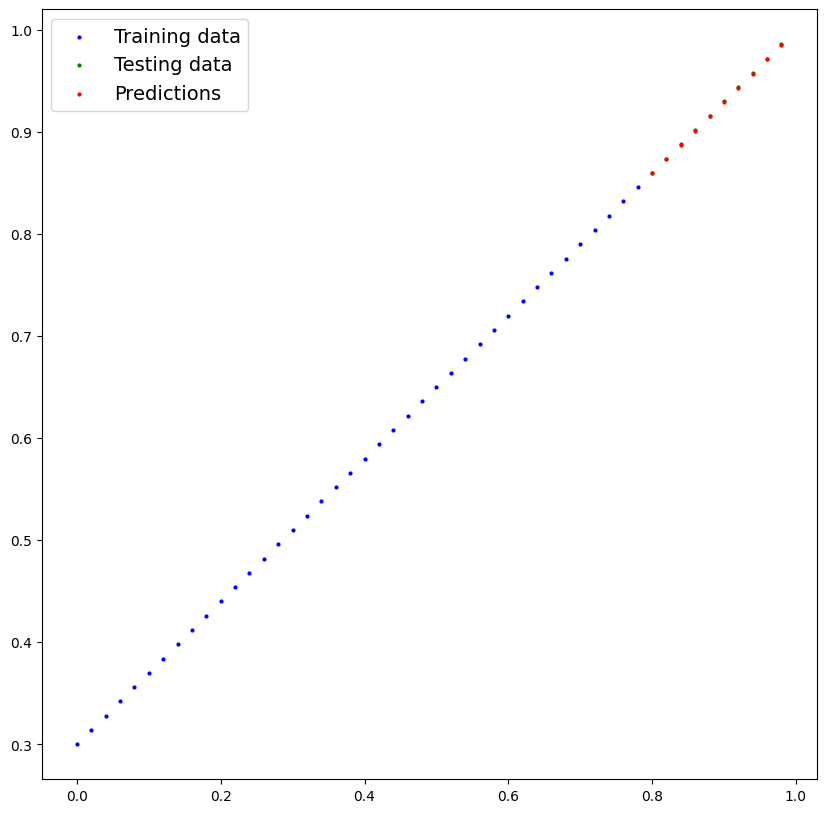

In [ ]:
predictions = linear_regressor(val_x)
plot_predictions(train_x,train_y,val_x,val_y,predictions.detach().numpy())

In [ ]:
print(linear_regressor.state_dict())
torch.save(linear_regressor.state_dict(),'model.pt')

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2999]))])


In [ ]:
model_0 = model()
model_0.load_state_dict(torch.load('model.pt'))
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2999]))])


**Day - 4**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.datasets import make_circles
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.manual_seed(42)

n_samples=1000
x,y =  make_circles(n_samples,random_state=42,noise=0.05)
print(len(x),len(y))
print(x[5:])

1000 1000
[[-0.46988549  0.70803745]
 [-0.01604538  0.80562331]
 [ 0.75962295  0.15952616]
 ...
 [-0.12823057 -0.82613318]
 [ 0.66090453 -0.79319015]
 [ 0.27841491  0.96735953]]


In [ ]:
data = pd.DataFrame({"X1":x[:,0],"X2":x[:,1],"Y":y})
data.head(5)

,X1,X2,Y
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0


<ipython-input-3-4aca0cfd2607>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=x[:,0],


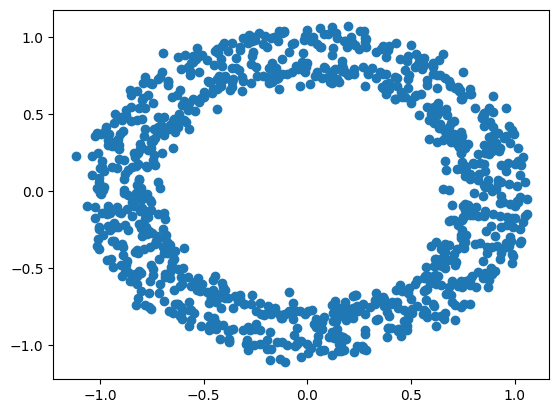

In [ ]:
plt.scatter(x=x[:,0],
            y=x[:,1],
            cmap = plt.cm.RdYlBu)

In [ ]:
from sklearn.model_selection import train_test_split
#Converting from numpy.ndarray to torch.Tensor
x = torch.from_numpy(x).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
print(x[0:5,:],y[:5])

tensor([[ 0.7422,  0.2467],
        [-0.7340,  0.1687],
        [-0.8299,  0.2220],
        [-0.4291,  0.6722],
        [ 0.4456, -0.8949]]) tensor([1., 1., 1., 1., 0.])


In [ ]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size =0.2,random_state=42 )
print(len(train_x),len(train_y),"\n",len(val_x),len(val_y))

800 800 
 200 200


In [ ]:
import torch.nn.functional as f
import torch.nn as nn

class model_2(nn.Module):
  def __init__(self,out_shape,in_shape,hidden):
    super(model_2,self).__init__()
    self.linear1=nn.Linear(2,hidden[0])
    self.linear2 = nn.Linear(hidden[0],1)
  def forward(self, x:torch.Tensor)-> torch.Tensor:
    # x = f.relu(self.linear1(x))
    # out = f.sigmoid(self.linear2(x))
    x = self.linear1(x)
    out = self.linear2(x)
    return out

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
import torch.nn as nn

hidden = [5]
circle_model = model_2(1,2,hidden).to(device)
criteria = nn.BCEWithLogitsLoss()
opt = torch.optim.Adam(circle_model.parameters(),lr=0.01)

In [ ]:
next(circle_model.parameters()).device

device(type='cuda', index=0)

In [ ]:
circle_model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.1390,  0.0424],
                      [ 0.1533,  0.6014],
                      [ 0.5195, -0.3258],
                      [ 0.1094,  0.4786],
                      [ 0.3292,  0.3926]], device='cuda:0')),
             ('linear1.bias',
              tensor([-0.0015, -0.3178,  0.3793, -0.1144,  0.0016], device='cuda:0')),
             ('linear2.weight',
              tensor([[-0.2444,  0.2224,  0.3612, -0.1378, -0.3220]], device='cuda:0')),
             ('linear2.bias', tensor([-0.0146], device='cuda:0'))])

In [ ]:
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
import numpy as np

def train_loop(n_epochs,criteria,model,opt,train_x,train_y,val_x,val_y):
  # loss_train=[]
  # loss_val=[]
  acc=[]

  for epoch in tqdm(range(n_epochs)):
    train_x, train_y = train_x.to(device), train_y.to(device)
    # total_loss = 0.0
    # for x,y in zip(train_x,train_y):
    model.train()
    opt.zero_grad()
    yhat = model(train_x).squeeze()
    l = criteria(yhat,train_y)
    l.backward()
    opt.step()
    # total_loss+=l.data.item()
    # loss_train.append((total_loss/len(yhat)))

    if epoch%20==0:
      model.eval()
      val_x,val_y = val_x.to(device),val_y.to(device)
      # total_val_loss = 0.0
      # correct =0
      with torch.inference_mode():
        # for x,y in zip(val_x,val_y):
        preds = model(val_x).squeeze()
        l_val = criteria(preds,val_y)

        # total_val_loss += l_val.data.item()
        pred_label = torch.round(torch.sigmoid(preds))
        acc_epoch = ((pred_label==val_y).sum().item()/len(preds)) *100
      # loss_val.append((total_val_loss/len(pred_label))*100)
        acc.append(acc_epoch)


  # return {'Loss train':loss_train, 'Loss validation':loss_val, 'Accuracy validation':acc}
  return {'Accuracy validation':acc}

In [ ]:
n_epochs=1000
val_acc = train_loop(n_epochs,criteria,circle_model,opt,train_x,train_y,val_x,val_y)
# print(f"The first 5 epochs loss during training: {train_loss[:5]}\nValidation loss recorded every 20 epochs: {val_loss[:5]}\nAccuracy on validation set: {acc}")
print(f"Accuracy on validation set: {val_acc}")

  0%|          | 0/1000 [00:00<?, ?it/s]

Accuracy on validation set: {'Accuracy validation': [49.5, 48.0, 46.5, 47.0, 46.5, 46.0, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5]}


**Day - 5**

In [ ]:
class model_3(nn.Module):
  # def __init__(self,hidden):
  def __init__(self,):
    super(model_3,self).__init__()
    # self.layers = nn.Sequential(nn.Linear(2,hidden[0]),
    #                             torch.nn.ReLU(),
    #                             nn.Linear(hidden[0],hidden[1]),
    #                             torch.nn.ReLU(),
    #                             nn.Linear(hidden[1],1))
    self.layer1= nn.Linear(2,10)
    self.layer2 = nn.Linear(10,10)
    self.layer3 = nn.Linear(10,1)
    self.relu = nn.ReLU()
  def forward(self, x:torch.Tensor)-> torch.Tensor:
    # return torch.round(torch.sigmoid(self.layers(x)))
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [ ]:
# hidden_3 = [10,10]
circle_model_3 = model_3().to(device)

In [ ]:
next(circle_model_3.parameters()).device

device(type='cuda', index=0)

In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary
print(summary(circle_model_3,input_size=(1,2),device='cuda'))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]              30
              ReLU-2                [-1, 1, 10]               0
            Linear-3                [-1, 1, 10]             110
              ReLU-4                [-1, 1, 10]               0
            Linear-5                 [-1, 1, 1]              11
Total params: 151
Trainable params: 151
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
None


In [ ]:
# layer1= circle_model_3.layers[0]
# print(layer1.in_features,)

**Day - 6**

In [ ]:
# val_acc_model_3 = train_loop(n_epochs,criteria,circle_model_3,opt,train_x,train_y,val_x,val_y)
# print(f'Validation accuracy with the updated model: {val_acc_model_3}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Validation accuracy with the updated model: {'Accuracy validation': [51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0]}


In [ ]:
import sklearn
from sklearn.metrics import accuracy_score
criteria_3 = nn.BCEWithLogitsLoss()
opt_3 = torch.optim.Adam(circle_model_3.parameters(), lr=0.1)
loss_train=[]
loss_vali=[]
acc_train=[]
acc_vali=[]
n_epochs=1000
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_x,train_y = train_x.to(device),train_y.to(device)
val_x,val_y = val_x.to(device),val_y.to(device)
for epoch in tqdm(range(n_epochs)):
  circle_model_3.train()
  logits = circle_model_3(train_x).squeeze()
  yhat = torch.round(torch.sigmoid(logits))
  loss = criteria_3(logits,train_y)
  train_acc = accuracy_score(yhat.cpu().detach().numpy(),train_y.cpu().detach().numpy())
  opt_3.zero_grad()
  loss.backward()
  opt_3.step()
  acc_train.append(train_acc)
  loss_train.append(loss)

  circle_model_3.eval()
  if epoch%100==0:
    with torch.inference_mode():
      logits_test = circle_model_3(val_x).squeeze()
      preds = torch.round(torch.sigmoid(logits_test))
      loss_val = criteria_3(logits_test,val_y)
      val_acc = accuracy_score(preds.cpu().detach().numpy(), val_y.cpu().detach().numpy())
    loss_vali.append(loss_val)
    acc_vali.append(val_acc)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(f'Training Accuracy: {acc_train}\nTraining loss: {loss_train}\nValidation accuracy: {acc_vali}\n Validation loss: {loss_vali}')

Training Accuracy: [0.5, 0.5, 0.5, 0.6375, 0.615, 0.56375, 0.5625, 0.6175, 0.75, 0.75, 0.8275, 0.90375, 0.8325, 0.87625, 0.78375, 0.9275, 0.93, 0.9225, 0.92, 0.96375, 0.955, 0.9675, 0.96375, 0.955, 0.98125, 0.9725, 0.97, 0.96375, 0.97625, 0.9725, 0.97625, 0.97375, 0.98, 0.98, 0.9775, 0.975, 0.975, 0.9825, 0.98, 0.98125, 0.97875, 0.9825, 0.985, 0.97875, 0.9775, 0.97875, 0.98625, 0.9825, 0.985, 0.9875, 0.98, 0.98375, 0.97875, 0.9825, 0.98, 0.9875, 0.98375, 0.98375, 0.985, 0.9825, 0.9825, 0.98125, 0.9875, 0.97875, 0.98, 0.9775, 0.9825, 0.985, 0.98375, 0.985, 0.98375, 0.98, 0.98, 0.98375, 0.985, 0.98625, 0.985, 0.98375, 0.98375, 0.9825, 0.98375, 0.98375, 0.9875, 0.98625, 0.9825, 0.98625, 0.98375, 0.985, 0.98375, 0.985, 0.98375, 0.9825, 0.9875, 0.98375, 0.9875, 0.98, 0.9875, 0.98375, 0.98875, 0.9825, 0.98625, 0.9875, 0.9825, 0.9875, 0.985, 0.98875, 0.985, 0.98875, 0.98625, 0.98625, 0.985, 0.98875, 0.985, 0.98875, 0.98625, 0.98875, 0.98625, 0.99125, 0.98375, 0.98, 0.97125, 0.97625, 0.9575, 0

In [ ]:
for layers in circle_model_3.children():
  print(layers)

Linear(in_features=2, out_features=10, bias=True)
Linear(in_features=10, out_features=10, bias=True)
Linear(in_features=10, out_features=1, bias=True)
ReLU()


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
%matplotlib inline

n_samples=1000
n_features=2
n_classes=4
seed=42

x,y = make_blobs(n_samples,n_features,centers=n_classes,cluster_std=1.5,
                 random_state=seed)
x,y = torch.from_numpy(x).type(torch.float32), torch.from_numpy(y).type(torch.LongTensor)
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.2,random_state=seed)

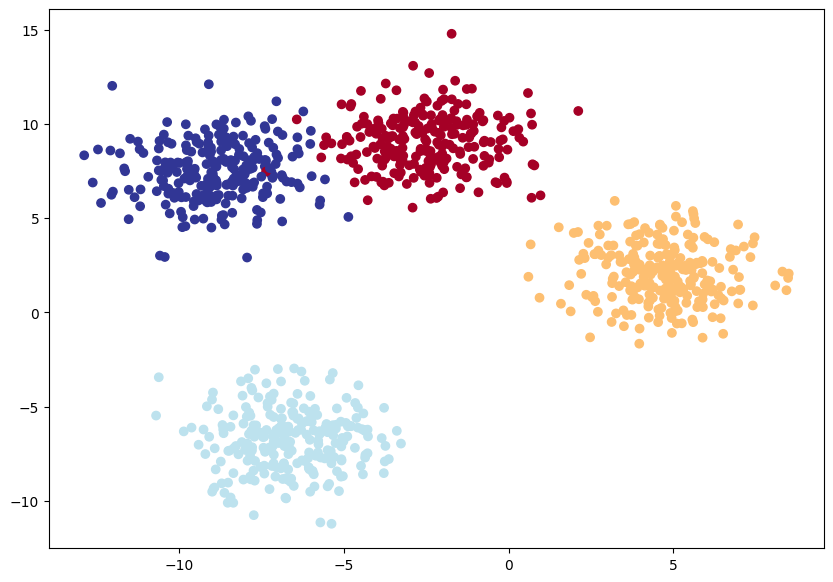

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

class model_blob(nn.Module):
  def __init__(self,inp,out,hidden):
    super(model_blob,self).__init__()
    self.layer1=nn.Linear(inp,hidden[0])
    self.layer2=nn.Linear(hidden[0],hidden[1])
    self.layer3=nn.Linear(hidden[1],out)
    # self.layer4=nn.Linear(hidden[2],hidden[3])
    self.relu = nn.ReLU()
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [ ]:
hidden_blob=[8,8,8]
model_4 = model_blob(inp=2,out=len(torch.unique(y)),hidden=hidden_blob).to(device)

In [ ]:
from torchsummary import summary
print(summary(model_4,input_size=(1,2),device='cuda'))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 8]              72
              ReLU-4                 [-1, 1, 8]               0
            Linear-5                 [-1, 1, 4]              36
Total params: 132
Trainable params: 132
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
None


In [ ]:
for layer in model_4.children():
  print(layer)

Linear(in_features=2, out_features=8, bias=True)
Linear(in_features=8, out_features=8, bias=True)
Linear(in_features=8, out_features=4, bias=True)
ReLU()


In [ ]:
from tqdm.auto import tqdm
import torch.nn.functional as f

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

def train_loop_custom(n_epochs,opt,criteria,train_x,train_y,val_x,val_y,model):
  train_loss = []
  val_loss = []
  train_acc = []
  val_acc = []

  train_x,train_y = train_x.to(device), train_y.to(device)
  val_x, val_y = val_x.to(device), val_y.to(device)
  for epoch in tqdm(range(n_epochs)):
    model.train()
    logits = model(train_x)
    loss = criteria(logits, train_y)
    probs = f.softmax(logits, dim=1)
    yhat = torch.argmax(probs, dim=1)
    opt.zero_grad()
    loss.backward()
    opt.step()
    acc = accuracy_score(yhat.cpu().detach().numpy(), train_y.cpu().detach().numpy())
    train_loss.append(loss.data.item())
    train_acc.append(acc)

    if epoch%100==0:
      model.eval()
      with torch.inference_mode():
        logits_val = model(val_x)
        loss_val = criteria(logits_val, val_y)
        probs_val = f.softmax(logits_val,dim=1)
        preds = torch.argmax(probs_val, dim=1)
        acc_val = accuracy_score(preds.cpu().detach().numpy(),val_y.cpu().detach().numpy())
      val_loss.append(loss_val.data.item())
      val_acc.append(acc_val)

  return {'training loss': train_loss, 'training accuracy': train_acc, 'validation loss':val_loss, 'validation accuracy': val_acc}

In [ ]:
print(len(train_x), len(train_y))
print(len(val_x), len(val_y))

800 800
200 200


In [ ]:
n_epochs = 1000
criteria = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model_4.parameters(),lr=0.1)
result = train_loop_custom(n_epochs,opt,criteria,train_x,train_y,val_x,val_y,model_4)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(f"Training loss for the first 5 epochs: {result['training loss'][:5]}\nTraining accuracy: {result['training accuracy']}\nValidation loss: {result['validation loss']}\nValidation accuracy: {result['validation accuracy']}")

In [ ]:
!pip install torchvision
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.8/764.8 kB 6.0 MB/s eta 0:00:00


# **Computer Vision**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchmetrics
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms

import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data = dset.FashionMNIST(root='data',train=True,download='True',transform=transforms.ToTensor(),target_transform=None)
test_data = dset.FashionMNIST(root='data', train=False, download=True, transform=transforms.ToTensor(), target_transform=None)

100%|██████████| 26421880/26421880 [00:02<00:00, 12042734.43it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201557.96it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3768240.98it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19365270.84it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
cti = train_data.class_to_idx
itc = {v:k for k,v in cti.items()}

In [ ]:
image, label = train_data[0]
print(image.shape)

torch.Size([1, 28, 28])


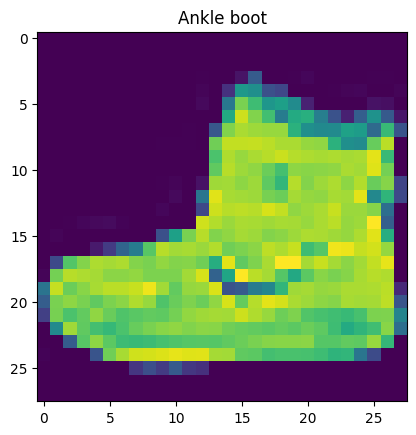

In [ ]:
# image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(itc[label])
plt.show()

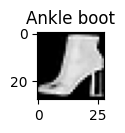

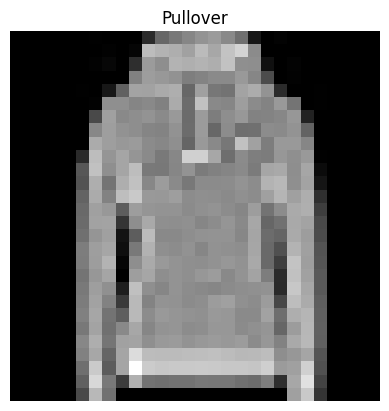

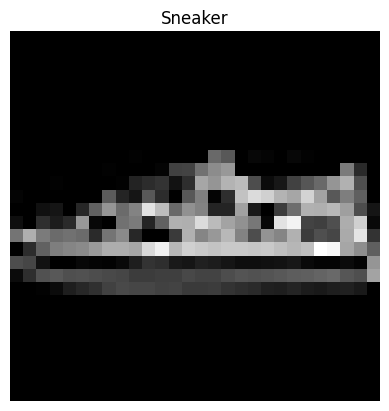

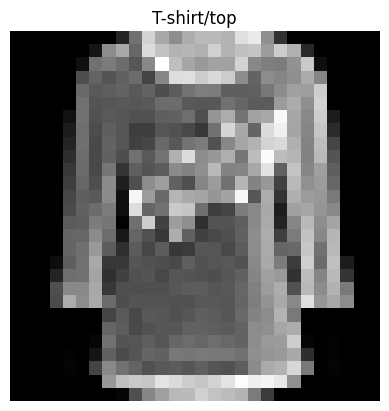

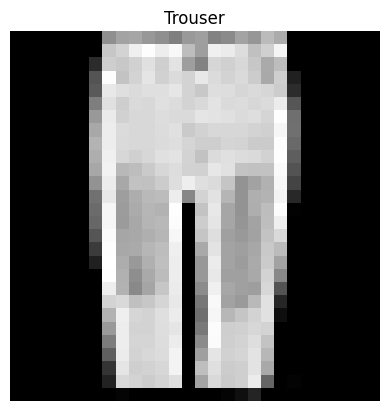

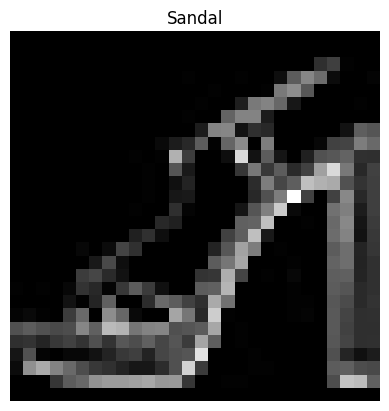

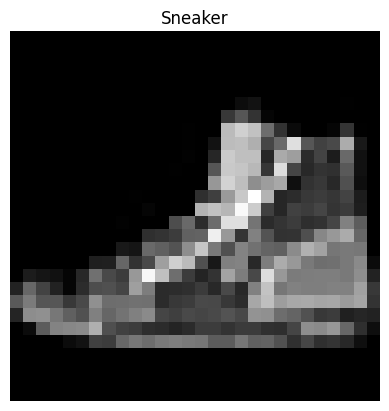

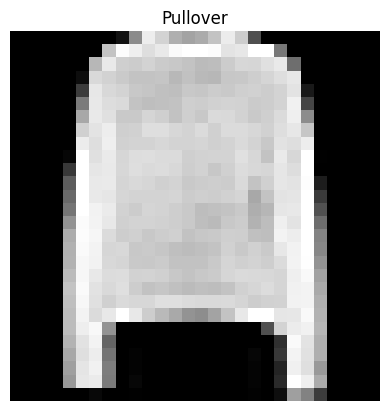

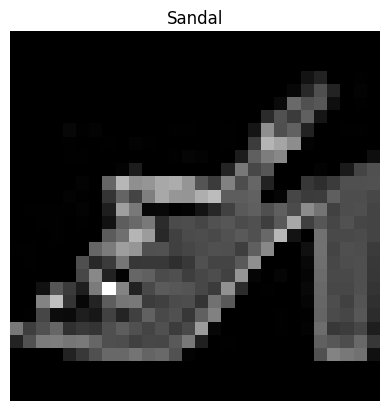

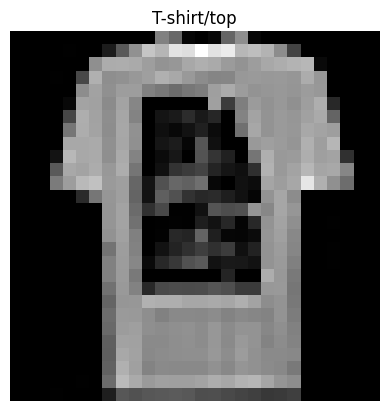

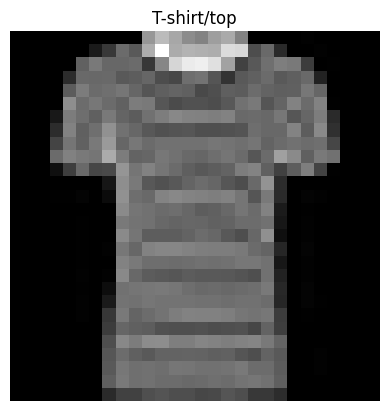

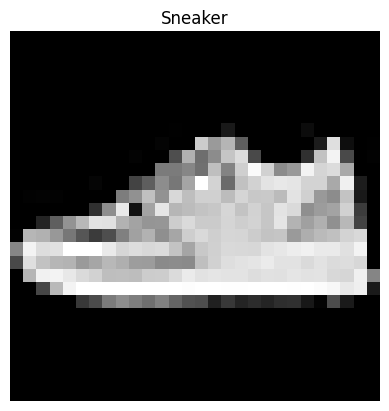

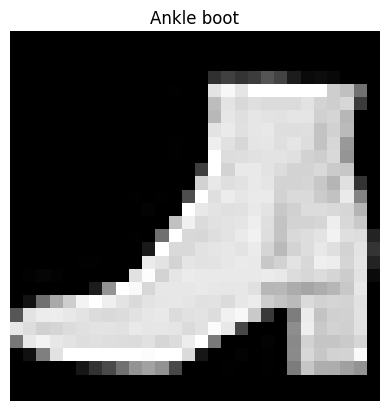

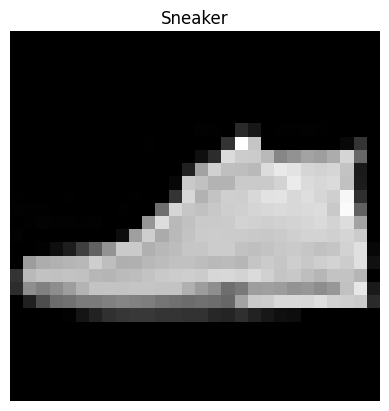

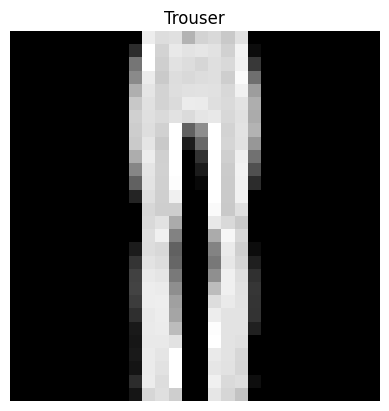

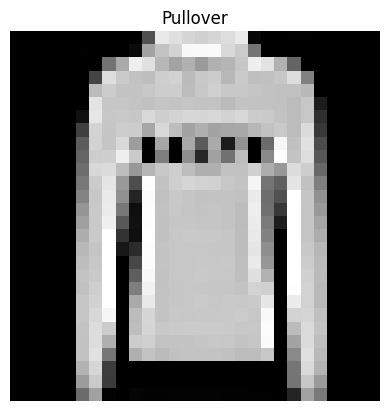

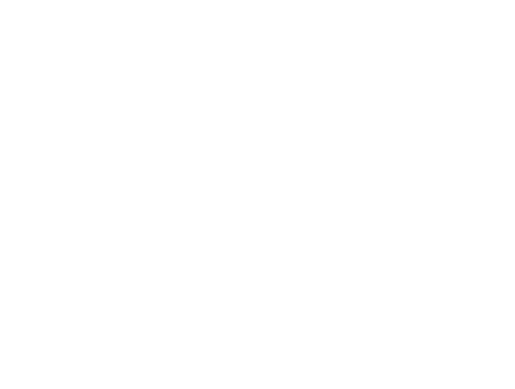

In [ ]:
fig = plt.figure(figsize=(4,4))
rows,cols=4,4

for i in range(1,rows*cols+1):
  idx = torch.randint(0,len(train_data), size=[1]).item()
  image, label = train_data[idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(itc[label])
  plt.show()
  plt.axis('off')

In [ ]:
bs = 32
train_loader = DataLoader(train_data, shuffle=True, batch_size=bs)
test_loader = DataLoader(test_data, shuffle=False, batch_size=bs)

In [ ]:
i, l = next(iter(train_loader))
# it, lt = next(iter(test_loader))

In [ ]:
i.shape, l.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

**Day - 7**

In [ ]:
classes = train_data.classes

In [ ]:
inp = 784
hidden=[10]
out=len(classes)
print(inp, hidden, out)

784 [10] 10


In [ ]:
class image_model_v0(nn.Module):
  def __init__(self, hidden, inp, out):
    super(image_model_v0, self).__init__()
    self.linear1 = nn.Linear(inp,hidden[0])
    self.linear2 = nn.Linear(hidden[0],out)
    self.flatten = nn.Flatten()
    # self.conv1 = nn.Conv2D()
    # self.conv1 = nn.Conv2D()
    # self.relu = nn.ReLU()
    # self.layer = nn.Sequential(nn.Flatten(),nn.Linear(inp,hidden[0]),nn.Linear(hidden[0],out))

  def forward(self, x:torch.Tensor)->torch.Tensor :
    return self.linear2(self.linear1(self.flatten(x)))
    # return self.layer(x)

In [ ]:
layer = nn.Sequential(nn.Flatten(),nn.Linear(inp,hidden[0]),nn.Linear(hidden[0],10))
dummy = torch.rand([1,1,28,28])
print(layer(dummy).shape)

torch.Size([1, 10])


In [ ]:
seed=42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# imodel = image_model_v0(hidden=hidden, inp=inp, out=out).to(device)
imodel = image_model_v0(hidden=hidden, inp=inp, out=out).cpu()
for layer in imodel.children():
  print(layer)

Linear(in_features=784, out_features=10, bias=True)
Linear(in_features=10, out_features=10, bias=True)
Flatten(start_dim=1, end_dim=-1)


In [ ]:
imodel.eval()
with torch.inference_mode():
  dummy = torch.rand([1,1,28,28]).cpu()
  print(imodel(dummy))

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]])


In [ ]:
criteria = nn.CrossEntropyLoss()
opt = torch.optim.SGD(imodel.parameters(), lr=0.01)

In [ ]:
from timeit import default_timer as timer
def inference(start:float, end:float, device:torch.device=None):
  return f"Train time on {device}: {(end-start):.3f} seconds"

In [ ]:
# #Testing
# device='cuda:0' if torch.cuda.is_available() else 'cpu'
# print(inference(10,20,device))

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
import torch.nn.functional as f
n_epochs = 2
def train_custom(n_epochs, model, train_loader, test_loader, criteria, opt):
  model.to(device)
  total_loss_train=[]
  accuracy_train=[]
  total_loss_val=[]
  accuracy_val=[]
  start = timer()
  for epoch in tqdm(range(n_epochs)):
    train_batch_loss=0
    for idx,(x,y) in enumerate(train_loader):
      x,y=(x.to(device)).float(),y.to(device)
      model.train()
      logits = model(x)
      yhat = torch.argmax(f.softmax(logits,dim=1), dim=1)
      acc_train = accuracy_score(yhat.cpu().detach().numpy(),y.cpu().detach().numpy())
      loss = criteria(logits, y)
      train_batch_loss += loss.data.item()
      opt.zero_grad()
      loss.backward()
      opt.step()
    total_loss_train.append(train_batch_loss/len(train_loader))
    accuracy_train.append(acc_train)

    if epoch%400==0:
      print(f'Looked at {idx+1} of {len(train_loader)} batches')

    test_loss=0
    model.eval()
    with torch.inference_mode():
      for a,b in test_loader:
        a,b=(a.to(device)).float(),b.to(device)
        logits_val = model(a)
        preds = torch.argmax(f.softmax(logits_val, dim=1), dim=1)
        val_acc_batch = accuracy_score(preds.cpu().detach().numpy(),b.cpu().detach().numpy())
        test_loss += criteria(logits_val,b).data.item()
      total_loss_val.append(test_loss/len(test_loader))
      accuracy_val.append(val_acc_batch)
  end=timer()
  print(f'Finished training on {device} in {(end-start):.3f} seconds')
  return {'train_loss':total_loss_train, 'train_acc':accuracy_train, 'val_loss':total_loss_val,'val_acc':accuracy_val}

In [ ]:
device='cpu'
results = train_custom(n_epochs, imodel, train_loader, test_loader, criteria, opt)
print(f"Training loss: {results['train_loss']}\nTraining accuracy: {results['train_acc']}\nValidation loss: {results['val_loss']}\nValidation accurcay: {results['val_acc']}")

  0%|          | 0/2 [00:00<?, ?it/s]

Looked at 1875 of 1875 batches
Finished training on cpu in 34.049 seconds
Training loss: [0.9077747557799022, 0.5569964647054673]
Training accuracy: [0.75, 0.875]
Validation loss: [0.6334522219892508, 0.5547297349848306]
Validation accurcay: [0.8125, 0.8125]


**Day - 8**

In [ ]:
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

def eval_model(model:torch.nn.Module, test_loader: torch.utils.data.DataLoader, criteria: torch.nn.Module, device:torch.device):
  l = []
  a = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    loss=0
    for idx, (x,y) in enumerate(test_loader):
      x,y=x.to(device).float(), y.to(device)
      logits = model(x)
      yhat = torch.argmax(f.softmax(logits, dim=1), dim=1)
      loss += criteria(logits,y).data.item()
      acc = accuracy_score(yhat.cpu().detach().numpy(), y.cpu().detach().numpy())
      print(f"Looked at {idx} of {len(test_loader)-1} batches")
    l.append((loss/len(test_loader)))
    a.append(acc)
  return {'model_name':model.__class__.__name__,'device':device, 'eval_loss':l, 'eval_acc':a}

In [ ]:
device='cpu'
eval_results = eval_model(imodel,test_loader,criteria,device)
print(f"The evaluation results for the model {eval_results['model_name']} on {eval_results['device']} are:\nEvaluation Loss: {eval_results['eval_loss']}\nEvaluation accuracy: {eval_results['eval_acc']}")

Looked at 0 of 312 batches
Looked at 1 of 312 batches
Looked at 2 of 312 batches
Looked at 3 of 312 batches
Looked at 4 of 312 batches
Looked at 5 of 312 batches
Looked at 6 of 312 batches
Looked at 7 of 312 batches
Looked at 8 of 312 batches
Looked at 9 of 312 batches
Looked at 10 of 312 batches
Looked at 11 of 312 batches
Looked at 12 of 312 batches
Looked at 13 of 312 batches
Looked at 14 of 312 batches
Looked at 15 of 312 batches
Looked at 16 of 312 batches
Looked at 17 of 312 batches
Looked at 18 of 312 batches
Looked at 19 of 312 batches
Looked at 20 of 312 batches
Looked at 21 of 312 batches
Looked at 22 of 312 batches
Looked at 23 of 312 batches
Looked at 24 of 312 batches
Looked at 25 of 312 batches
Looked at 26 of 312 batches
Looked at 27 of 312 batches
Looked at 28 of 312 batches
Looked at 29 of 312 batches
Looked at 30 of 312 batches
Looked at 31 of 312 batches
Looked at 32 of 312 batches
Looked at 33 of 312 batches
Looked at 34 of 312 batches
Looked at 35 of 312 batches
Lo

**Device agnostic code:**

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
eval_results = eval_model(imodel,test_loader,criteria,device)
print(f"The evaluation results for the model {eval_results['model_name']} on {eval_results['device']} are:\nEvaluation Loss: {eval_results['eval_loss']}\nEvaluation accuracy: {eval_results['eval_acc']}")

Looked at 0 of 312 batches
Looked at 1 of 312 batches
Looked at 2 of 312 batches
Looked at 3 of 312 batches
Looked at 4 of 312 batches
Looked at 5 of 312 batches
Looked at 6 of 312 batches
Looked at 7 of 312 batches
Looked at 8 of 312 batches
Looked at 9 of 312 batches
Looked at 10 of 312 batches
Looked at 11 of 312 batches
Looked at 12 of 312 batches
Looked at 13 of 312 batches
Looked at 14 of 312 batches
Looked at 15 of 312 batches
Looked at 16 of 312 batches
Looked at 17 of 312 batches
Looked at 18 of 312 batches
Looked at 19 of 312 batches
Looked at 20 of 312 batches
Looked at 21 of 312 batches
Looked at 22 of 312 batches
Looked at 23 of 312 batches
Looked at 24 of 312 batches
Looked at 25 of 312 batches
Looked at 26 of 312 batches
Looked at 27 of 312 batches
Looked at 28 of 312 batches
Looked at 29 of 312 batches
Looked at 30 of 312 batches
Looked at 31 of 312 batches
Looked at 32 of 312 batches
Looked at 33 of 312 batches
Looked at 34 of 312 batches
Looked at 35 of 312 batches
Lo

In [ ]:
class image_model_v1(nn.Module):
  def __init__(self, hidden, inp, out):
    super(image_model_v0, self).__init__()
    self.linear1 = nn.Linear(inp,hidden[0])
    self.linear2 = nn.Linear(hidden[0],out)
    self.flatten = nn.Flatten()
    # self.conv1 = nn.Conv2D()
    # self.conv1 = nn.Conv2D()
    self.relu = nn.ReLU()
    # self.layer = nn.Sequential(nn.Flatten(),nn.Linear(inp,hidden[0]),nn.Linear(hidden[0],out))

  def forward(self, x:torch.Tensor)->torch.Tensor :
    return self.relu(self.linear2(self.relu(self.linear1(self.flatten(x)))))
    # return self.layer(x)

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
results = train_custom(n_epochs, imodel, train_loader, test_loader, criteria, opt)
print(f"Training loss: {results['train_loss']}\nTraining accuracy: {results['train_acc']}\nValidation loss: {results['val_loss']}\nValidation accurcay: {results['val_acc']}")

  0%|          | 0/2 [00:00<?, ?it/s]

Looked at 1875 of 1875 batches
Finished training on cuda:0 in 20.695 seconds
Training loss: [0.5017957148313522, 0.47640913616021474]
Training accuracy: [0.90625, 0.90625]
Validation loss: [0.5209274783302039, 0.5001363777600157]
Validation accurcay: [0.875, 0.875]


In [ ]:
class conv_v1(nn.Module):
  def __init__(self, inp, out, hidden,k,s,p):
    super(conv_v1, self).__init__()
    self.flatten=nn.Flatten()
    self.linear1 = nn.Linear(hidden*9, out)
    # self.linear1 = nn.Linear()
    self.conv1 = nn.Conv2d(inp, hidden,k,s,p)
    self.conv2 = nn.Conv2d(hidden,hidden,k,s,p)
    self.conv3 = nn.Conv2d(hidden,hidden,k,s,p)
    self.conv4 = nn.Conv2d(hidden,hidden,k,s,p)
    self.pool1 = nn.MaxPool2d(k)
    self.pool2 = nn.MaxPool2d(k)
    self.relu = nn.ReLU()
    self.bnorm = nn.BatchNorm2d(hidden)

  def forward(self, x:torch.Tensor)->torch.Tensor:
    # x = self.flatten(x)
    # x = self.relu(self.linear1(x))
    x = self.bnorm(self.relu(self.conv1(x)))
    x = self.bnorm(self.relu(self.conv2(x)))
    x = self.pool1(x)
    x = self.bnorm(self.relu(self.conv3(x)))
    x = self.bnorm(self.relu(self.conv4(x)))
    x = self.pool2(x)
    x = self.flatten(x)
    out = self.linear1(x)
    return out

In [ ]:
inp = 1
out = len(train_data.classes)
hidden = 10
k=3
s=1
p=1

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
conv_model = conv_v1(1, out, hidden,k,s,p).to(device)

In [ ]:
for layers in conv_model.children():
  print(layers)

Flatten(start_dim=1, end_dim=-1)
Linear(in_features=90, out_features=10, bias=True)
Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
ReLU()
BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [ ]:
dummy = torch.rand([32,1,28,28]).to('cuda:0')
conv_model.to('cuda:0')
test = (dummy[0]).unsqueeze(0)
conv_model(test)

tensor([[-1.3214, -1.5090, -1.5002, -1.0349, -1.4142,  0.1500, -2.5906,  0.5605,
         -0.3936, -0.4843]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
conv_opt = torch.optim.Adam(conv_model.parameters(), lr = 0.01)
conv_results = train_custom(10, conv_model, train_loader, test_loader, criteria, conv_opt)

  0%|          | 0/10 [00:00<?, ?it/s]

Looked at 1875 of 1875 batches
Finished training on cuda:0 in 188.147 seconds


In [ ]:
print(f"Training loss: {conv_results['train_loss']}\nTraining accuracy: {conv_results['train_acc']}\nValidation loss: {conv_results['val_loss']}\nValidation accurcay: {conv_results['val_acc']}")

Training loss: [0.4325828619559606, 0.3303257541219393, 0.3056574302971363, 0.2893920152882735, 0.27919323018292586, 0.26914053724805515, 0.26357341531813144, 0.2543079882820447, 0.24977223134289187, 0.24675849595169227]
Training accuracy: [0.84375, 0.90625, 0.9375, 1.0, 0.90625, 0.96875, 0.96875, 0.90625, 0.96875, 0.875]
Validation loss: [5.064394311021311, 3.283469691444129, 3.7817337345391415, 4.9537300393223385, 5.070656188379842, 7.789096943486613, 7.623129273375002, 9.051752445415948, 9.456438792780185, 8.217850970003171]
Validation accurcay: [0.0625, 0.25, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625]


In [ ]:
# image, label = next(iter(train_loader))
# test_img, test_label = image[0], label[0]
# print(test_img.shape)

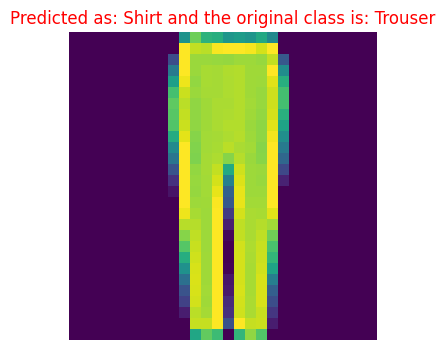

In [ ]:
test_img, test_label = next(iter(train_loader))
image, label = test_img[0], test_label[0]
image, label = image.to('cuda:0'), label.to('cuda:0')
figure = plt.figure(figsize=(4,4))
temp = image.cpu().permute(1,2,0)
plt.imshow(temp)
yhat = torch.argmax(f.softmax((conv_model(image.unsqueeze(0))),dim=1),dim=1)
if yhat==label:
  plt.title(f'Predicted as: {classes[yhat.cpu().item()]} and the original class is: {classes[label.cpu().item()]}', c='g')
else:
  plt.title(f'Predicted as: {classes[yhat.cpu().item()]} and the original class is: {classes[label.cpu().item()]}', c='r')
  plt.axis('off')
  plt.show()
%matplotlib inline

**Day - 8**

In [ ]:
!pip install torchmetrics -U mlxtend
import torchmetrics
import mlxtend
print(mlxtend.__version__,torchmetrics.__version__)

0.22.0 1.1.2


In [ ]:
from sklearn.metrics import confusion_matrix
from torchmetrics import ConfusionMatrix
from tqdm.auto import tqdm

# device = 'cuda:0' if torch.cuda.is_available() else 'cpu '
device = 'cpu'
test_preds = []
targets = []
(conv_model.to(device)).eval()
with torch.inference_mode():
  for x, y in tqdm(test_loader):
    x,y = x.to(device), y.to(device)
    preds = conv_model(x)
    yhat = torch.argmax(f.softmax(preds,dim=1),dim=1)
    test_preds.append(yhat)
    targets.append(y)

updated_targets = torch.cat(targets)
updated = torch.cat(test_preds)
tmcm = ConfusionMatrix(num_classes = len(classes), task='multiclass')
tmcm.update(updated, updated_targets)
cmap1 = tmcm.compute()
cmap2 = confusion_matrix(updated.cpu(), updated_targets.cpu())

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
print(cmap1)

tensor([[  14,    0,    0,    0,    0,    0,  986,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
        [   0,    0,    7,    0,    0,    0,  993,    0,    0,    0],
        [  31,    0,    0,    0,    0,    0,  969,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
        [   3,    0,    0,    0,    0,    0,  997,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
        [   1,    0,    0,    0,    0,    0,  999,    0,    0,    0],
        [   2,    0,    0,    0,    0,    0,  998,    0,    0,    0]])


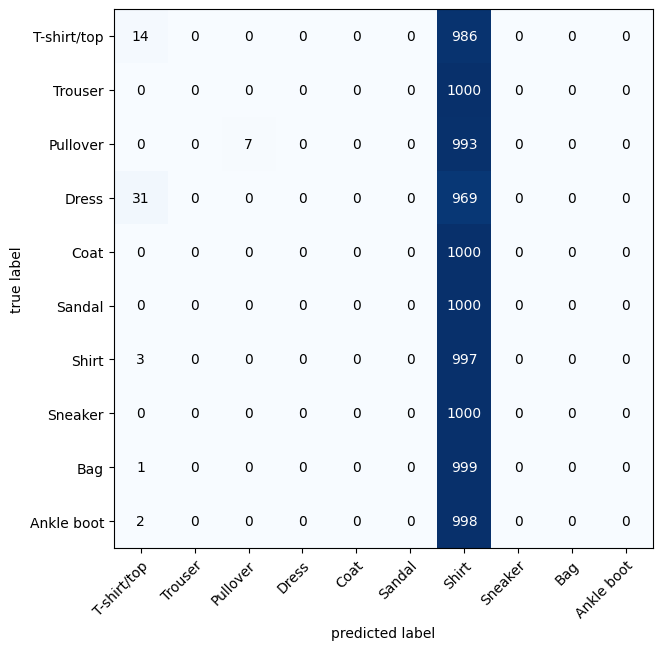

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat = cmap1.numpy(), class_names = classes, figsize =(7,7))

In [ ]:
torch.save(conv_model.state_dict(), 'best_imodel.pt')
conv_loaded = conv_v1(1, out, hidden,k,s,p)
conv_loaded.load_state_dict(torch.load('best_imodel.pt'))
for layer in conv_loaded.children():
  print(layer)

Flatten(start_dim=1, end_dim=-1)
Linear(in_features=90, out_features=10, bias=True)
Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
ReLU()
BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


**Day - 9**

**Custom - Datasets**

In [20]:
from torch.utils.data import Dataset, DataLoader
import zipfile
import requests
from pathlib import Path
import os
import torch

In [21]:
root = Path('conv_data')
img_dir = root/ 'p_z_s'

if img_dir.is_dir():
  print('Directory exists')
else:
  with open('data.zip','wb') as fs:
    img_dir.mkdir(parents=True, exist_ok=True)
    print(f'Downloading data')
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    fs.write(request.content)
    print(f'File downloaded and saved as {fs.name}')

  with zipfile.ZipFile('data.zip') as zip_ref:
    print(f'Extracting {zip_ref}')
    zip_ref.extractall(img_dir)
    print('File extracted')

Directory exists


In [22]:
def walk(dir_path):
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f'There are {len(filename)} files inside the directory {dirname} under the directory {dirpath}')

In [23]:
walk(img_dir)

There are 0 files inside the directory ['train', 'test'] under the directory conv_data/p_z_s
There are 0 files inside the directory ['steak', 'sushi', 'pizza'] under the directory conv_data/p_z_s/train
There are 75 files inside the directory [] under the directory conv_data/p_z_s/train/steak
There are 72 files inside the directory [] under the directory conv_data/p_z_s/train/sushi
There are 78 files inside the directory [] under the directory conv_data/p_z_s/train/pizza
There are 0 files inside the directory ['steak', 'sushi', 'pizza'] under the directory conv_data/p_z_s/test
There are 19 files inside the directory [] under the directory conv_data/p_z_s/test/steak
There are 31 files inside the directory [] under the directory conv_data/p_z_s/test/sushi
There are 25 files inside the directory [] under the directory conv_data/p_z_s/test/pizza


In [24]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [25]:
train_dir = img_dir / 'train'
test_dir = img_dir / 'test'
print(train_dir, test_dir)

conv_data/p_z_s/train conv_data/p_z_s/test


In [26]:
from PIL import Image
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import random

In [27]:
seed = 42
random.seed(seed)
img_paths = list(img_dir.glob('*/*/*.jpg'))
labels = [path.parent.stem for path in img_paths]
print(img_paths[:5], labels[:5])

[PosixPath('conv_data/p_z_s/train/steak/1264154.jpg'), PosixPath('conv_data/p_z_s/train/steak/2881783.jpg'), PosixPath('conv_data/p_z_s/train/steak/2324994.jpg'), PosixPath('conv_data/p_z_s/train/steak/1937872.jpg'), PosixPath('conv_data/p_z_s/train/steak/1787505.jpg')] ['steak', 'steak', 'steak', 'steak', 'steak']


Image path: conv_data/p_z_s/train/steak/2163079.jpg
Image class: steak
Image shape: (384, 512)


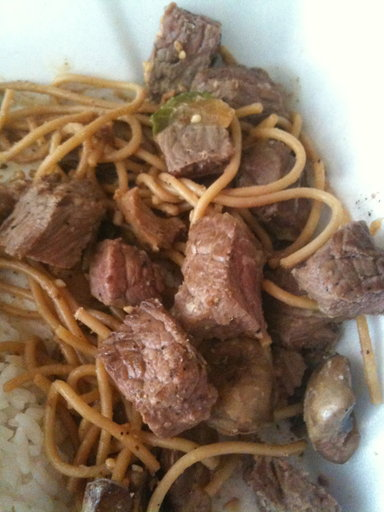

In [28]:
random_path = random.choice(img_paths)
cls = random_path.parent.stem
img = Image.open(random_path)
print(f'Image path: {random_path}\nImage class: {cls}\nImage shape: {img.size}')
img

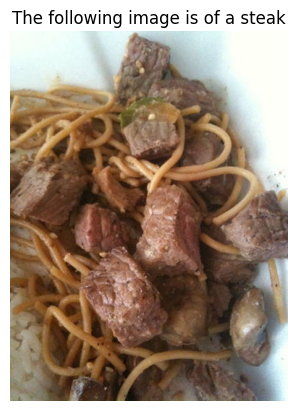

In [29]:
import matplotlib.pyplot as plt
import numpy as np

img_mlib = np.asarray(img)
plt.imshow(img_mlib)
plt.title(f'The following image is of a {cls}')
plt.grid('off')
plt.axis('off')
plt.show()
%matplotlib inline

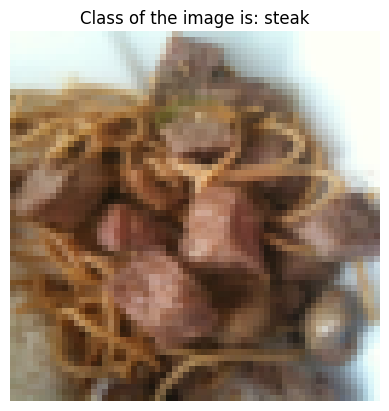

In [30]:
bs = 32
trans_pipeline = transforms.Compose([transforms.Resize((64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

transformed = (trans_pipeline(img)).permute(1,2,0)
transformed.shape
plt.imshow(transformed)
plt.title(f'Class of the image is: {cls}')
plt.axis('off')
plt.show()

In [31]:
trans_pipeline = transforms.Compose([transforms.Resize((64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

train_set = ImageFolder(root = train_dir, transform = trans_pipeline, target_transform = None)
test_set = ImageFolder(root = test_dir, transform = trans_pipeline, target_transform = None)

print(f' Training Image Folder: {train_set}\nTesting Image Folder: {test_set}')

 Training Image Folder: Dataset ImageFolder
    Number of datapoints: 225
    Root location: conv_data/p_z_s/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Testing Image Folder: Dataset ImageFolder
    Number of datapoints: 75
    Root location: conv_data/p_z_s/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [32]:
bs = 1
train_loader = DataLoader(train_set, bs, shuffle=True)
test_loader = DataLoader(test_set, bs, shuffle=False)

print(f'Training dataloader: {next(iter(train_loader))}\n\nTesting Loader: {next(iter(test_loader))}')

Training dataloader: [tensor([[[[0.9020, 0.8902, 0.8784,  ..., 0.5098, 0.5451, 0.5882],
          [0.9059, 0.8863, 0.8784,  ..., 0.6118, 0.6157, 0.5922],
          [0.8824, 0.8706, 0.8627,  ..., 0.6706, 0.6510, 0.6078],
          ...,
          [0.7608, 0.7020, 0.6431,  ..., 0.9373, 0.9569, 0.9608],
          [0.8392, 0.7922, 0.7412,  ..., 0.9686, 0.9647, 0.9608],
          [0.9020, 0.8902, 0.8314,  ..., 0.9647, 0.9647, 0.9608]],

         [[0.6706, 0.6549, 0.6588,  ..., 0.2392, 0.2784, 0.3255],
          [0.6549, 0.6667, 0.6824,  ..., 0.3176, 0.3294, 0.3255],
          [0.7020, 0.7059, 0.7059,  ..., 0.3765, 0.3569, 0.3451],
          ...,
          [0.6431, 0.5804, 0.5098,  ..., 0.8706, 0.8941, 0.9059],
          [0.6078, 0.5608, 0.5137,  ..., 0.9059, 0.9137, 0.9137],
          [0.6353, 0.6275, 0.5765,  ..., 0.9137, 0.9098, 0.9098]],

         [[0.4745, 0.4824, 0.4980,  ..., 0.1647, 0.1882, 0.2353],
          [0.4196, 0.5020, 0.5490,  ..., 0.1961, 0.2118, 0.2431],
          [0.5647, 0

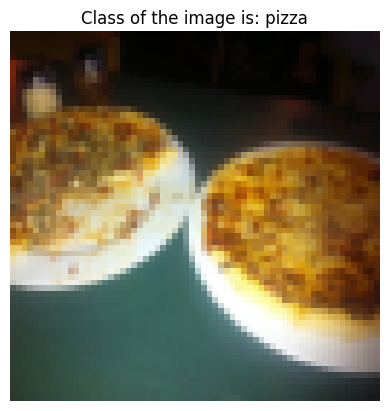

In [33]:
classes = train_set.classes
viz_img, viz_label = train_set[0]
plt.imshow(viz_img.permute(1,2,0))
plt.title(f'Class of the image is: {classes[viz_label]}')
plt.axis('off')
plt.show()

In [36]:
from pathlib import Path
from PIL import Image
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from typing import Tuple,Dict, List

In [42]:
def scan_dir(dir: str)-> Tuple[List[str], Dict[str,int]]:
  classes = sorted(entry.name for entry in os.scandir(dir) if dir.is_dir())

  if not classes:
    print('No classes found.')
  class_to_idx = {cls:i for i,cls in enumerate(classes)}
  return classes, class_to_idx

In [43]:
classes, c2i = scan_dir(train_dir)
print(classes, c2i)

['pizza', 'steak', 'sushi'] {'pizza': 0, 'steak': 1, 'sushi': 2}


In [56]:
class custom_data(Dataset):
  def __init__(self, root, transform = None, target_transform = None):
    super(custom_data, self).__init__()
    self.root = root
    self.paths = list(Path(self.root).glob('*/*.jpg'))
    self.transform = transform
    self.target_transform = target_transform
    self.classes, self.class_to_idx = scan_dir(self.root)

  def load_images(self,idx):
    img_path = self.paths[idx]
    img = Image.open(img_path)
    return img

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, idx):
    img = self.load_images(idx)
    if self.transform:
      img = self.transform(img)
    label = self.class_to_idx[((self.paths[idx]).parent.stem)]
    if self.target_transform:
      label = self.target_transform(label)
    return (img, label)

In [57]:
train_custom = custom_data(root = train_dir, transform = trans_pipeline)
test_custom = custom_data(root = test_dir, transform = trans_pipeline)
print(train_custom, test_custom)

<__main__.custom_data object at 0x7a2007de9fc0> <__main__.custom_data object at 0x7a2007debf40>


In [58]:
print(len(train_custom),len(test_custom))
print(train_custom.classes, test_custom.classes)
print(train_custom.class_to_idx, test_custom.class_to_idx)

225 75
['pizza', 'steak', 'sushi'] ['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2} {'pizza': 0, 'steak': 1, 'sushi': 2}


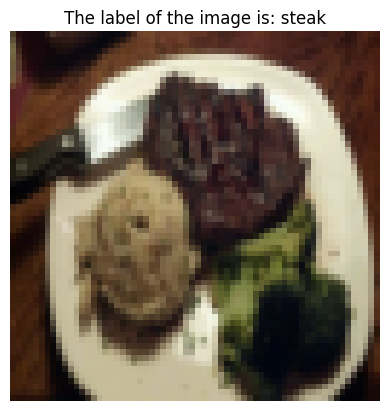

In [60]:
classes = train_custom.classes
image, label = train_custom[0]
plt.imshow(image.permute(1,2,0))
plt.title(f'The label of the image is: {classes[label]}')
plt.axis('off')
plt.show()
%matplotlib inline

In [71]:
from torch.utils.data import DataLoader

bs=32
train_loader_custom = DataLoader(train_custom, batch_size = bs, shuffle = True)
test_loader_custom = DataLoader(test_custom, batch_size = bs, shuffle = False)
print(train_loader_custom, test_loader_custom)

<torch.utils.data.dataloader.DataLoader object at 0x7a1fe92c6cb0> <torch.utils.data.dataloader.DataLoader object at 0x7a1fe92c70d0>


In [72]:
imgs,labels = next(iter(train_loader_custom))
print(imgs.shape, labels.shape)

torch.Size([32, 3, 64, 64]) torch.Size([32])


**Day - 10**